In [2]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from utils import load, plot_history, compose_alpha, plot_history
from models import own_custom_conv_net, neuralmon_conv_net, smaller_VGGNet

In [3]:
def custom_CNN_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)),   
        
        layers.Conv2D(32, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(64, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 

        layers.Conv2D(128, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(150, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Flatten(), 
        layers.Dense(64, activation='relu'), 
        layers.Dense(18, activation='sigmoid'), 
    ])
    
    model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

In [4]:
train_dataset, val_dataset = load(csv="pokemon_image_dataset.csv", image_path="./images/pokemon_image_dataset")
train_dataset2, val_dataset2 = load(csv="synthetic_pokemon.csv", image_path="./images/synthetic_pokemon")
train_dataset3, val_dataset3 = load(csv="synthetic_pokemon_v2.csv", image_path="./images/synthetic_pokemon_v2")

In [95]:
histories = []

In [96]:
model1 = custom_CNN_model((120,120,3))

history = model1.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history)

model2 = custom_CNN_model((120,120,3))

history = model2.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset2,
    verbose = 1
)
histories.append(history)

model3 = custom_CNN_model((120,120,3))

history = model3.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset3,
    verbose = 1
)
histories.append(history)

Epoch 1/50


c:\Uni\Enhancing-Pokemon-Type-Recognition-with-Hybrid-Datasets\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - AUC: 0.5346 - Precision: 0.0868 - Recall: 0.1992 - accuracy: 0.0811 - loss: 0.5381 - val_AUC: 0.5221 - val_Precision: 0.0838 - val_Recall: 0.4792 - val_accuracy: 0.0802 - val_loss: 0.6679
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - AUC: 0.7012 - Precision: 0.4230 - Recall: 0.0222 - accuracy: 0.2162 - loss: 0.2686 - val_AUC: 0.5661 - val_Precision: 0.1022 - val_Recall: 0.6107 - val_accuracy: 0.1111 - val_loss: 0.6870
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - AUC: 0.7845 - Precision: 0.5377 - Recall: 0.0487 - accuracy: 0.3332 - loss: 0.2442 - val_AUC: 0.5406 - val_Precision: 0.1008 - val_Recall: 0.6000 - val_accuracy: 0.0494 - val_loss: 0.7653
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - AUC: 0.8432 - Precision: 0.7754 - Recall: 0.1240 - accuracy: 0.4091 - loss: 0.2169 - val_AUC: 0.5397 - val_Precision: 0.0972 - val_Recall: 0.5403 - val_accuracy: 0.0494 - val_loss: 0.7634
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11

Max   training accuracy Model 1 in Epoch 40 with value 0.7928902506828308
Max validation accuracy Model 1 in Epoch 32 with value 0.8641975522041321

Max   training accuracy Model 2 in Epoch 15 with value 0.80216383934021
Max validation accuracy Model 2 in Epoch 8 with value 0.0923076942563057

Max   training accuracy Model 3 in Epoch 42 with value 0.8052549958229065
Max validation accuracy Model 3 in Epoch 3 with value 0.12082262337207794



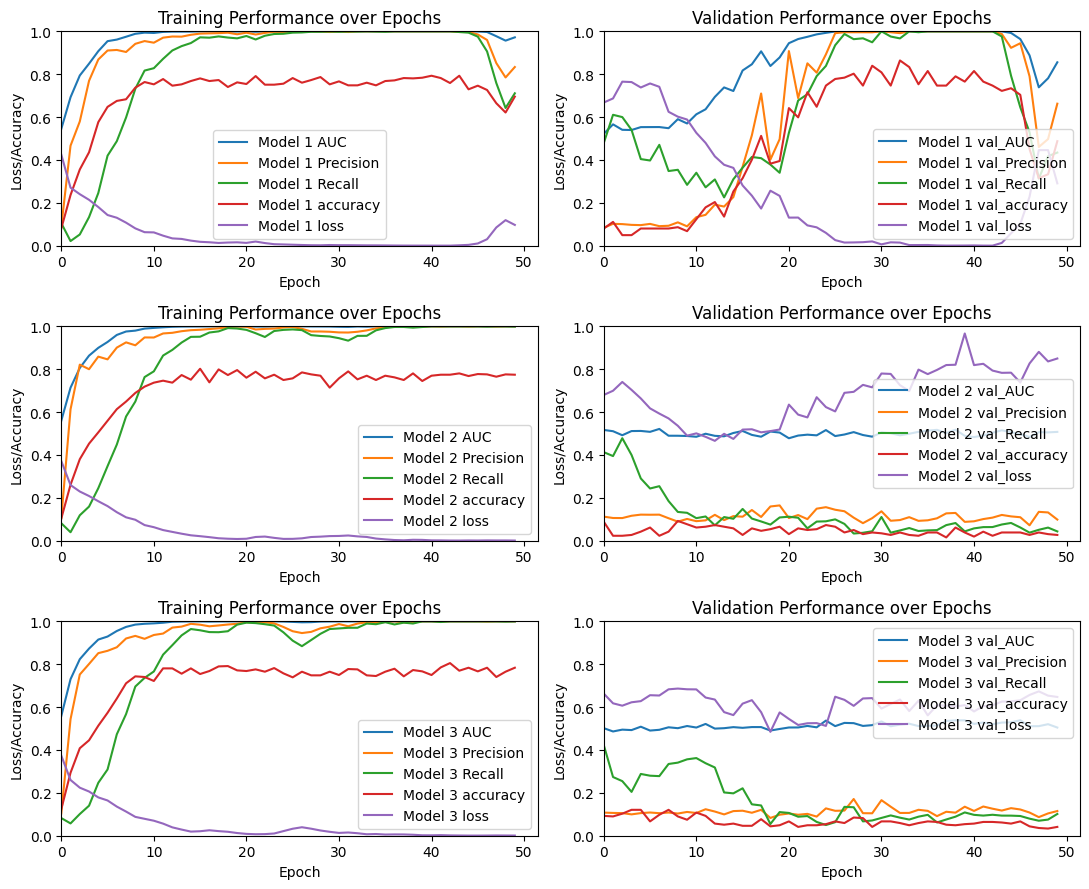

In [97]:
for i, history in enumerate(histories):
    print("Max   training accuracy Model "+str(i+1)+" in Epoch", np.argmax(history.history['accuracy']), "with value", np.max(history.history['accuracy']))
    print("Max validation accuracy Model "+str(i+1)+" in Epoch", np.argmax(history.history['val_accuracy']), "with value", np.max(history.history['val_accuracy']))
    print()

plot_history(histories)

tf.Tensor([1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(18,), dtype=int32)
(120, 120, 3)


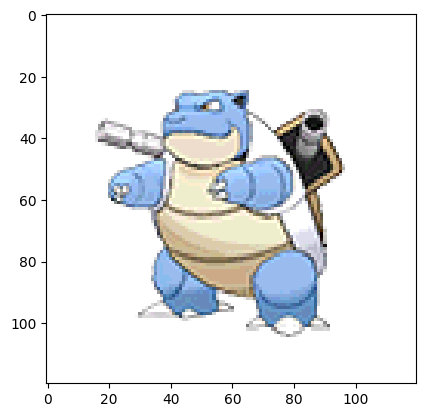

In [10]:
for sample in val_dataset:
    #pred = model1.predict(sample[0])
    #pred = model1(sample[0], training=False)
    print(sample[1][0])
    #print(np.around(pred[0], decimals=3))
    img = sample[0][0].numpy()
    print(img.shape)
    # print tensorflow accuracy of the prediction
    #print("Accuracy: ", np.mean(tf.keras.metrics.binary_accuracy(sample[1], pred).numpy()))

    plt.imshow(img, interpolation='nearest')
    plt.show()
    break